## IMPORTING THE LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## CREATING AND TRAINING THE NEURAL NET

In [5]:
max_len = X.shape[1]

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_len,),name="input_layer"),
    tf.keras.layers.Dense(32,activation = 'relu',name="dense1"),
    tf.keras.layers.Dense(1,activation='sigmoid',name="output"),
])

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=10,batch_size=20)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6780 - loss: 0.8454 - val_accuracy: 0.6098 - val_loss: 0.9748
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6759 - loss: 0.8219 - val_accuracy: 0.6585 - val_loss: 0.9027
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6697 - loss: 0.8255 - val_accuracy: 0.5041 - val_loss: 1.1026
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5845 - loss: 0.9236 - val_accuracy: 0.6911 - val_loss: 0.9621
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6468 - loss: 0.8052 - val_accuracy: 0.5935 - val_loss: 0.8945
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6729 - loss: 0.7574 - val_accuracy: 0.5935 - val_loss: 0.8263
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6744 - loss: 0.6822 - val_accuracy: 0.6504 - val_loss: 0.7683
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7143 - loss: 0.6477 - val_accuracy: 0.5935 - val_loss

## EVALUVATING THE MODEL

In [14]:
loss,acc = model.evaluate(X_test,y_test,verbose=0)
print(f"test accuracy = {acc:.4f}")

test accuracy = 0.6883


In [15]:
y_pred = model.predict(X_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


array([[0.7835239 ],
       [0.20313227],
       [0.3579226 ],
       [0.65313774],
       [0.10455424],
       [0.28350943],
       [0.26481432],
       [0.66571695],
       [0.2961125 ],
       [0.6352836 ],
       [0.32681966],
       [0.7921931 ],
       [0.7116933 ],
       [0.885408  ],
       [0.8177502 ],
       [0.57482874],
       [0.64059365],
       [0.65725666],
       [0.85819733],
       [0.5843896 ],
       [0.08118307],
       [0.90208125],
       [0.4501084 ],
       [0.8774702 ],
       [0.4017721 ],
       [0.11754272],
       [0.24662764],
       [0.33901048],
       [0.6976347 ],
       [0.29629683],
       [0.16874427],
       [0.09010766],
       [0.5122828 ],
       [0.7438504 ],
       [0.9284287 ],
       [0.08259546],
       [0.21906175],
       [0.11725448],
       [0.25416204],
       [0.30091852],
       [0.5276454 ],
       [0.06139277],
       [0.591774  ],
       [0.7310977 ],
       [0.09509855],
       [0.5210275 ],
       [0.8479769 ],
       [0.227

In [16]:
y_pred = (y_pred>0.5).astype("int32")
y_pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[71, 29],
       [19, 35]])

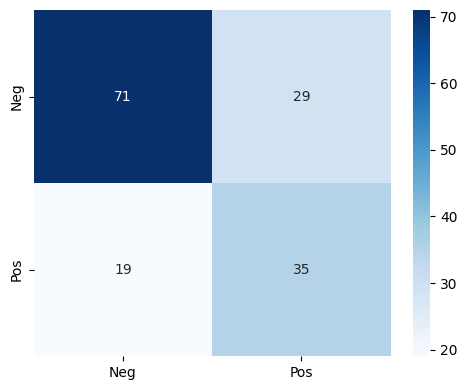

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Neg","Pos"],yticklabels=["Neg","Pos"])
plt.tight_layout()
plt.show()